In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [file for file in os.listdir('./oneminutesdic21')]

diciembre = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesdic21/'+file)
  diciembre = pd.concat([diciembre, df])

In [3]:
diciembre.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X,5308,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2021-12-10 00:00:00,101688,0,13.81,47.46,754.3604,NaN,NaN
4,2021-12-10 00:01:00,101689,0,13.82,47.44,754.3532,NaN,NaN


# Arreglando la tabla

In [4]:
diciembre.drop(diciembre.index[0:3], axis = 0, inplace = True)
diciembre.drop(['OneMinute', '5308'],axis='columns', inplace=True)

# Convirtiendolo a float

In [5]:
diciembre = diciembre.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.05.01':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [6]:
prom_rad = diciembre['CR1000X'].mean()
prom_Tamb = diciembre['8543.1'].mean()
prom_atm = diciembre['CPU:Est_meteo1.CR1X'].mean()
proms_diciembre = [prom_rad, prom_Tamb,prom_atm]
diciembre.describe()

,8543,CR1000X,8543.1,CR1000X.Std.05.01,CPU:Est_meteo1.CR1X
count,44640.000000,44640.000000,44640.000000,44640.000000,44640.000000
mean,111047.500000,204.324481,14.920984,42.962304,753.901540
std,12886.602345,290.406008,3.486071,17.091820,1.589657
min,88728.000000,0.000000,8.140000,6.444000,749.113000
25%,99887.750000,0.000000,11.890000,28.780000,752.810475
50%,111047.500000,0.000000,14.670000,43.860000,753.995200
75%,122207.250000,422.700000,17.720000,55.462500,754.976200
max,133367.000000,966.000000,23.800000,84.900000,758.016600


In [7]:
diciembre.to_csv('diciembre22.csv', index=False)
mes = 'diciembre'
anio = '2021'

# Radiacion diciembre

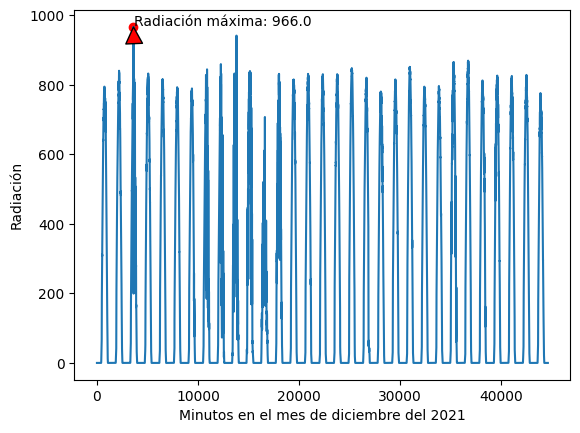

In [8]:
df = pd.read_csv("diciembre22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente diciembre

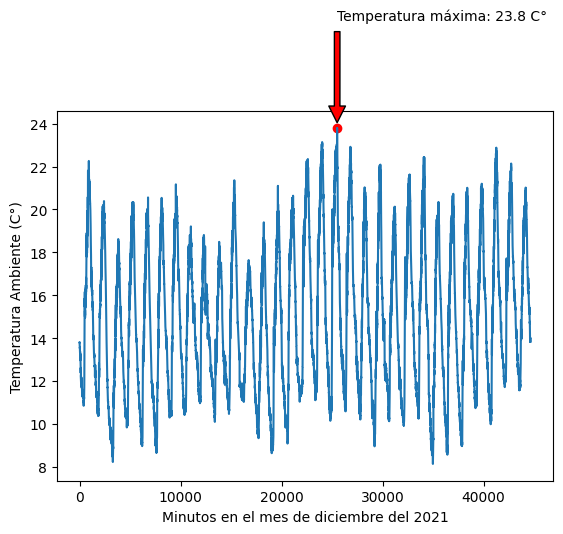

In [9]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion diciembre

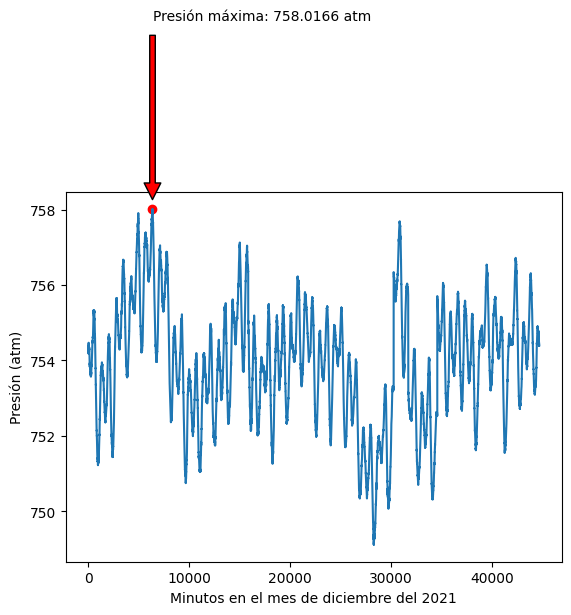

In [10]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()